In [17]:
import numpy as np
import pandas as pd

#computer vision library
import cv2
#glob
from glob import glob

import pickle

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
## Loading data sets
def load_data_training_and_test():
    npzfile = np.load('training_data.npz')
    train_data = npzfile['arr_0']
    
    npzfile = np.load('training_labels.npz')
    train_labels = npzfile['arr_0']
    
    npzfile = np.load('test_data.npz')
    test_data = npzfile['arr_0']

    npzfile = np.load('test_labels.npz')
    test_labels = npzfile['arr_0']
    
    return (train_data, train_labels), (test_data, test_labels)


In [3]:
(x_train_KNN, y_train_KNN), (x_test_KNN, y_test_KNN) = load_data_training_and_test()

In [4]:
# Change our image type to float32 data type
x_train_KNN = x_train_KNN.astype('float32')
x_test_KNN = x_test_KNN.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train_KNN /= 255
x_test_KNN /= 255

print(x_train_KNN.shape)
print(y_train_KNN.shape)
print(x_test_KNN.shape)
print(y_test_KNN.shape)

(17756, 40000)
(17756,)
(4370, 40000)
(4370,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=120)

knn.fit(x_train_KNN,y_train_KNN)


KNeighborsClassifier(n_neighbors=120)

In [6]:
y_pred_knn=knn.predict(x_test_KNN)
y_pred_knn

array([ 60,   3, 107, ...,  42,  38, 108], dtype=int64)

In [7]:
accuracy_score(y_pred_knn,y_test_KNN)
print(classification_report(y_pred_knn,y_test_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.03      0.17      0.04         6
           2       0.35      0.05      0.09       330
           3       0.00      0.00      0.00        29
           4       0.02      0.02      0.02        44
           5       0.00      0.00      0.00         4
           6       0.05      0.20      0.08        10
           7       0.03      0.33      0.05         3
           8       0.00      0.00      0.00        65
           9       0.32      0.07      0.11       266
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        48
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         1
          16       0.03      0.08      0.04        13
          17       0.03    

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
##reduce set to test if we can obtain an better k value from a range of number
X_train_KNN_R, X_test_KNN_R, y_train_KNN_R, y_test_KNN_R = train_test_split(x_test_KNN, y_test_KNN, test_size=0.2)

print(X_train_KNN_R.shape)
print(y_train_KNN_R.shape)
print(X_test_KNN_R.shape)
print(y_test_KNN_R.shape)

(3496, 40000)
(3496,)
(874, 40000)
(874,)


In [29]:
mean_acc = np.zeros(201)
for i in range(1,200):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_KNN_R,y_train_KNN_R)
    y_pred1_KNN= knn.predict(X_test_KNN_R)
    mean_acc[i-1] = metrics.accuracy_score(y_test_KNN_R, y_pred1_KNN)

mean_acc

array([0.02745995, 0.02059497, 0.01830664, 0.01830664, 0.0194508 ,
       0.02173913, 0.02517162, 0.03089245, 0.03203661, 0.03089245,
       0.02974828, 0.02974828, 0.02974828, 0.02631579, 0.02631579,
       0.02402746, 0.02517162, 0.02517162, 0.02517162, 0.02745995,
       0.02745995, 0.02517162, 0.02059497, 0.0228833 , 0.0228833 ,
       0.02173913, 0.0228833 , 0.02402746, 0.02517162, 0.02402746,
       0.02402746, 0.02173913, 0.0228833 , 0.02517162, 0.02517162,
       0.02517162, 0.02745995, 0.02860412, 0.02860412, 0.02860412,
       0.02745995, 0.02745995, 0.02974828, 0.02860412, 0.02631579,
       0.02631579, 0.02631579, 0.02745995, 0.02745995, 0.02631579,
       0.02631579, 0.02745995, 0.02745995, 0.02631579, 0.02631579,
       0.02745995, 0.02631579, 0.02631579, 0.02745995, 0.02860412,
       0.02745995, 0.02860412, 0.02745995, 0.02860412, 0.02860412,
       0.02974828, 0.02974828, 0.02974828, 0.02974828, 0.03203661,
       0.03318078, 0.03089245, 0.03089245, 0.02974828, 0.03203

In [34]:
mean_acc.shape

(201,)

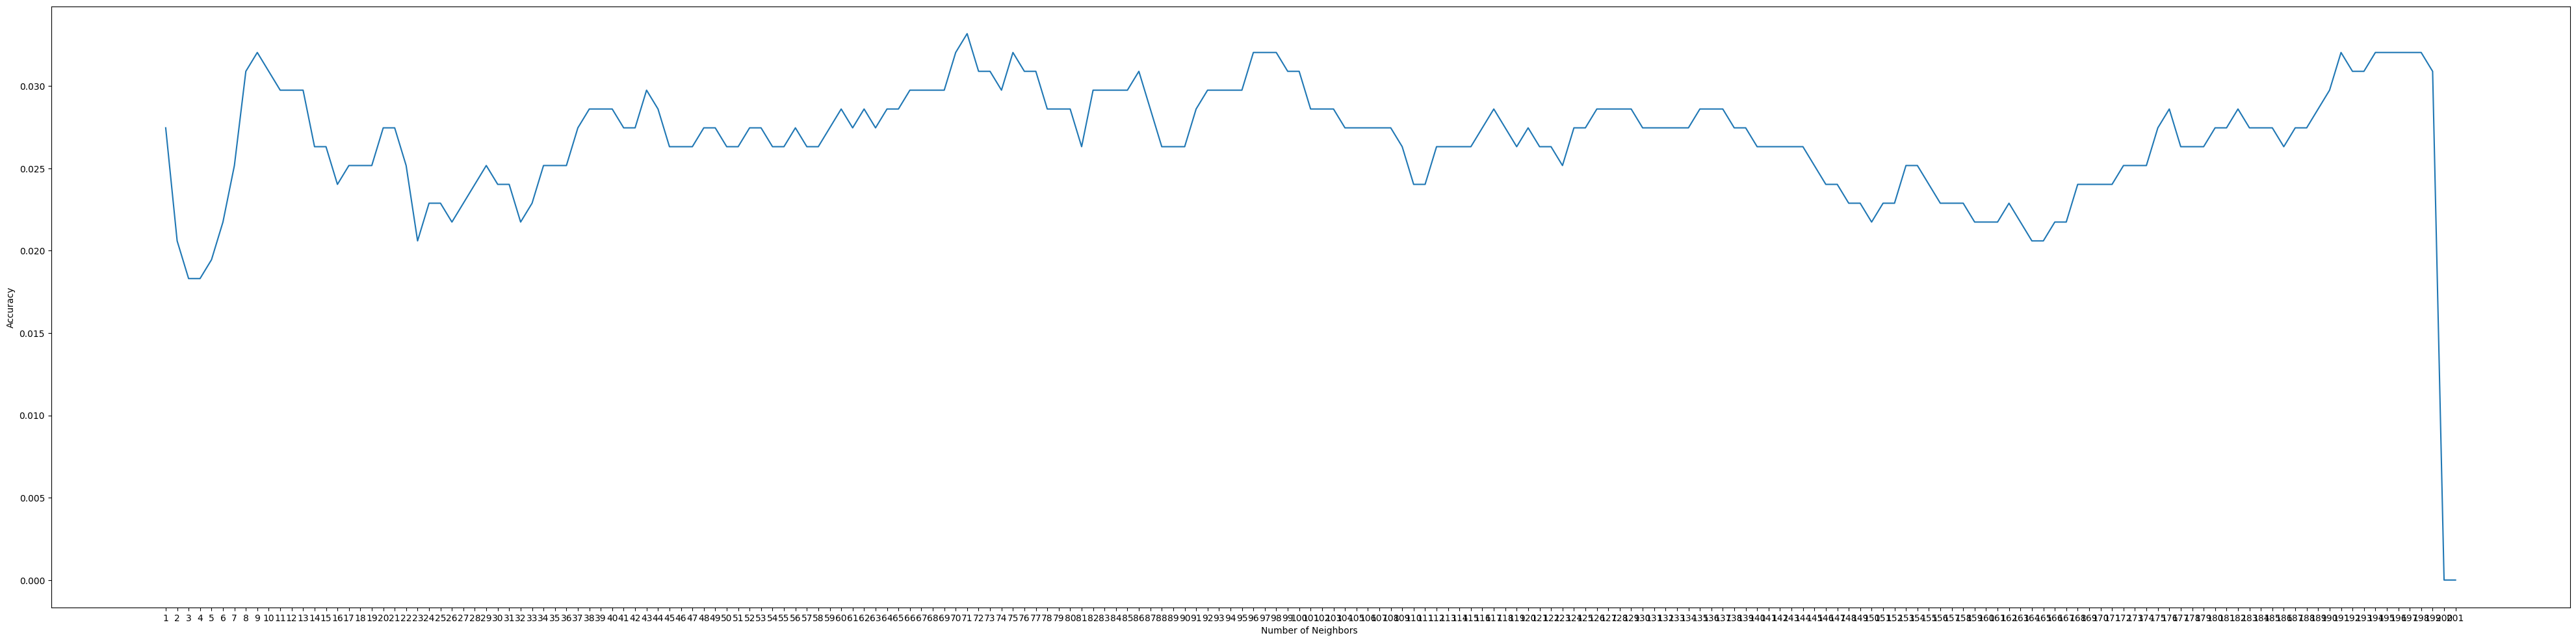

In [45]:
loc = np.arange(1,202,step=1.0)
plt.figure(figsize = (50, 12))
plt.plot(range(1,202), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()